<h1><center><font size=10>Sentiment Analysis on IMDB Reviews of Movies</center></font></h1>
<h1><center>Natural Language Processing</center></h1>

<img src="IMDB.svg" style = "width:500px;height:200px"></center>
  <b><h2><center>Yash Dubbaka</center></h2></b>

**Overview** 

IMDb is an online database of information related to films, television, TV series, home videos, video games, and online streaming - including cast, production crews, personal biographies, plot summaries, trivia, `Ratings`,and postive and critical `Reviews`. 
IMDb began as a fan-operated movie database on the Usenet group in 1990 and moved to the internet in 1993. It's now owned by IMDb.com Inc., a subsidiary of Amazon.

Movie reviews help users decide whether a movie is worth watching. A summary of reviews for a movie can help user make quick decisions, rather than spending time reading the many reviews of a movie. 
Sentiment analysis helps in rating how positive or negative a movie review is and hence the process of understanding if a review is positive or negative can be automated as the machine learns different techniques from the domain of Natural Language Processing. 

**Acknowledgement** 
This dataset was derived from www.kaggle.com

**Code Inspiration**
-  Kaggle.com community.
-  YT.com community & contributors.

**Objective**

This dataset contains 10000 movie reviews. The objective is to do Sentiment Analysis (positive/negative) for the movie reviews using different techniques , like supervised and unsupervised methods, and compare which gives the most accurate results. 

**Data Attribute Information**

- review: reviews of the movies.
- sentiment: indicates the sentiment of the review 0 or 1 (0 is for negative review and 1 for positive review)

**Approach**

- Import Libraries and Load Dataset.
- Overview of data.
- Data Visualization.
- Data preparation.
- text data encoding using Count Vectorizer and TF-IDF.
- Split the data into train and test samples
- Build ML based classification model.
- Perform Unsupervised learning models Sentiment Analysis using Vader Sentiment Analysis and Text Blob.
- Compare the accuracies of every model
- Conclusion.

**Models Built**

**Supervised Models**:
- *Bag of Words*
- *TF-IDF (Term - Inverse Document Frequency) 

**Unsupervised Model**: 
- *TextBlob*
- *VADER Sentiment*

### **Importing the required libraries**
Importing the required libraries upfront-so that the working is smoother. 

In [ ]:
import re
import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk                                         #Natural language processing tool-kit

nltk.download('stopwords')    #download stopwords
nltk.download('punkt')

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer
from nltk.tokenize import word_tokenize 

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

!pip install vaderSentiment    # Install vader sentiment package
!pip install textblob   # Install textblob package

# install and import necessary libraries.

!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt   
from sklearn.model_selection import KFold , StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score
import seaborn as sns
from textblob import TextBlob

from sklearn.ensemble import RandomForestClassifier       # Import Random forest Classifier
from sklearn.metrics import classification_report         # Import Classification report
from sklearn.model_selection import cross_val_score    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mithu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mithu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


### **Loading the dataset**
Reading the dataset from my local computer. I have downloaded the same from https://www.kaggle.com/code/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews/data . 

In [ ]:
# Loading data into pandas dataframe
data = pd.read_csv("imdb_reviews.csv")

In [ ]:
data.head()

,review,sentiment
0,"Okay, I know this does'nt project India in a g...",1
1,Despite John Travolta's statements in intervie...,0
2,"I am a kung fu fan, but not a Woo fan. I have ...",1
3,He seems to be a control freak. I have heard h...,0
4,"Admittedly, there are some scenes in this movi...",1


**Observations**

- A sentiment value of 0 is `negative`, while 1 represents a `positive` sentiment.

### **Exploratory Data Analysis (EDA)**

In [ ]:
data.shape               # print shape of data.

(10000, 2)

In [ ]:
data.isnull().sum(axis=0)          # Check for NULL values.

review       0
sentiment    0
dtype: int64

### **Word Cloud For Negative Reviews**

In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
#creating word cloud for negative reviews
negative_reviews=data[data['sentiment']==0]
words = ' '.join(negative_reviews['review'])
cleaned_word = " ".join([word for word in words.split()])

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

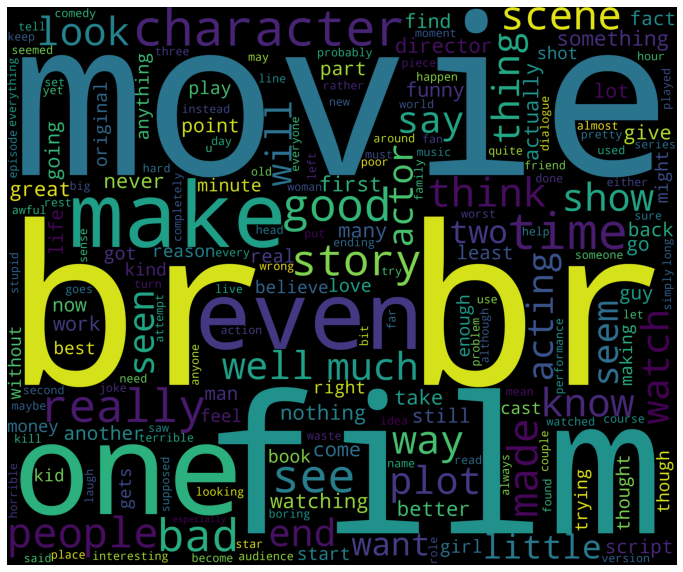

In [ ]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Observations**

- **bad, end, want, little, one, film, never, plot, way, know, really, make, character** are some of the important recurring words observed in the negative reviews. 

### **Word Cloud For Positive Reviews**

In [ ]:
#creating word cloud for positive reviews
positive_reviews=data[data['sentiment']==1]
words = ' '.join(positive_reviews['review'])
cleaned_word = " ".join([word for word in words.split()])

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

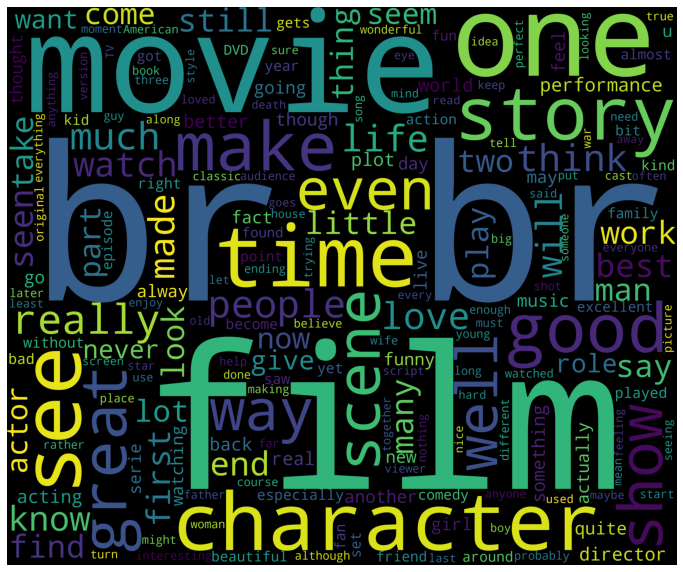

In [ ]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Observations**

- **Know, Character, film, show, way, great, lot, good, really, make, story, one, etc** were some of the important words observed in the positive reviews. 

In [ ]:
data['sentiment'].unique()         #check the labels

array([1, 0], dtype=int64)

In [ ]:
data['sentiment'].value_counts()     # check the count of each labels

1    5037
0    4963
Name: sentiment, dtype: int64

**Observations**

- So we have 5037 `postive` reviews and 4963 `negative` reviews.

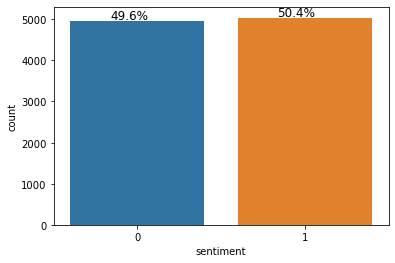

In [ ]:
#plot the distribution of the class label
def bar_plot(data, feature):
    plot = sns.countplot(x =feature, data = data)
    total = len(data)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y),ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points")
    plt.show()
    
bar_plot(data,'sentiment')

### **Data Pre-Processing for Model Building**

- Removing the html tags.
- Replacing contractions in string. (e.g. replace I'm --> I am) and so on.
- Removing numbers.
- Tokenization.
- Removing Stopwords.
- Lemmatized data.
- I have used the NLTK library to tokenize words, remove stopwords and lemmatize the remaining words.

In [ ]:
#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

#expand the contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

#remove the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

def clean_text(text):
    text = strip_html(text)
    text = replace_contractions(text)
    text = remove_numbers(text)
    return text
data['review'] = data['review'].apply(lambda x: clean_text(x))
data.head()

,review,sentiment
0,"Okay, I know this does'nt project India in a g...",1
1,Despite John Travolta's statements in intervie...,0
2,"I am a kung fu fan, but not a Woo fan. I have ...",1
3,He seems to be a control freak. I have heard h...,0
4,"Admittedly, there are some scenes in this movi...",1


In [ ]:
data['review'] = data.apply(lambda row: nltk.word_tokenize(row['review']), axis=1) # Tokenization of data
data.head()

,review,sentiment
0,"[Okay, ,, I, know, this, does'nt, project, Ind...",1
1,"[Despite, John, Travolta, 's, statements, in, ...",0
2,"[I, am, a, kung, fu, fan, ,, but, not, a, Woo,...",1
3,"[He, seems, to, be, a, control, freak, ., I, h...",0
4,"[Admittedly, ,, there, are, some, scenes, in, ...",1


In [ ]:
stopwords = stopwords.words('english')
stopwords = list(set(stopwords)) 
lemmatizer = WordNetLemmatizer()

#remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# convert all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

# Remove the punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Remove the stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

# lemmatize the words
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

#data['review'] = data['review'].astype(str)
data['review'] = data.apply(lambda row: normalize(row['review']), axis=1)

In [ ]:
data.head()

,review,sentiment
0,okay know doesnt project india good light over...,1
1,despite john travolta statements interview fav...,0
2,kung fu fan woo fan interest gangster movies f...,1
3,seem control freak hear comment lose control s...,0
4,admittedly scenes movie seem little unrealisti...,1


### **Model 1: Supervised Learning for Sentiment Analysis**

**Bag of Words** (CountVectorizer)

In the `Bag of words` technique, we construct a dictionary that contains a set of all unique words from our text review dataset. Then the frequency of the unique words are counted. So, if there are **d** unique words in our dictionary, then for every review the vector will be of length **d**. The counts of words from reviews are stored at its particular location in the vector. These types of vectors aren't common. 

In [ ]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

Count_vec = CountVectorizer(max_features=500)                # Keep only 500 features as number of features will increase the processing time.
data_features = Count_vec.fit_transform(data['review'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [ ]:
data_features.shape       #Shape of the feature vector

(10000, 500)

In [ ]:
X = data_features

y = data.sentiment

In [ ]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [ ]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [ ]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

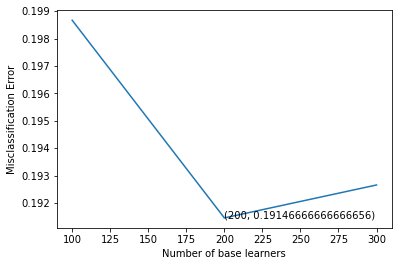

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
count_vectorizer_predicted = clf.predict(X_test)
print(classification_report(y_test ,count_vectorizer_predicted , target_names = ['0' , '1']))
print("Accuracy of the model is : ",accuracy_score(y_test,count_vectorizer_predicted))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1224
           1       0.82      0.81      0.81      1276

    accuracy                           0.81      2500
   macro avg       0.81      0.81      0.81      2500
weighted avg       0.81      0.81      0.81      2500

Accuracy of the model is :  0.81


[[ 995  229]
 [ 246 1030]]


<AxesSubplot:>

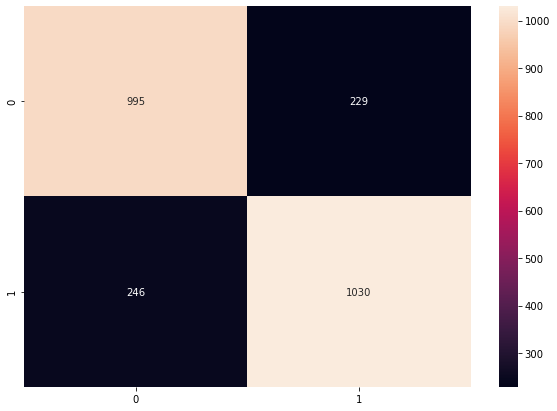

In [ ]:
# Print and plot Confusion matrix to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, count_vectorizer_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1']],
                  columns = [i for i in ['0', '1']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [1]:
all_features = Count_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=','
    
print(top_features)  

print(" ") 
print(" ")     

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

NameError: ignored

### **Model 2: TF-IDF**

**Term Frequency -  Inverse Document Frequency:** This makes sure that less importance is given to the most frequent words, and less frequent words are also considered.

In [ ]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=500)
data_features = tfidf_vect.fit_transform(data['review'])

data_features = data_features.toarray()

data_features.shape     #feature shape

(10000, 500)

In [ ]:
X = data_features

y = data.sentiment

In [ ]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

In [ ]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = np.arange(100,400,100).tolist()
base_ln

[100, 200, 300]

In [ ]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

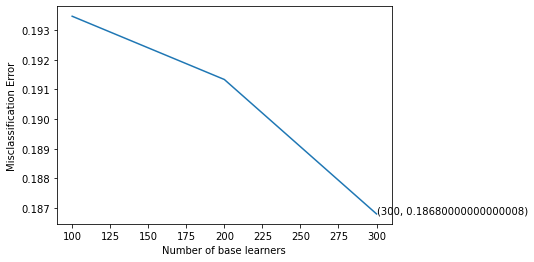

In [ ]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
tf_idf_predicted = clf.predict(X_test)
print(classification_report(y_test , tf_idf_predicted , target_names = ['0' , '1']))
print("Accuracy of the model is : ",accuracy_score(y_test,tf_idf_predicted))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1224
           1       0.83      0.82      0.82      1276

    accuracy                           0.82      2500
   macro avg       0.82      0.82      0.82      2500
weighted avg       0.82      0.82      0.82      2500

Accuracy of the model is :  0.82


[[1006  218]
 [ 232 1044]]


<AxesSubplot:>

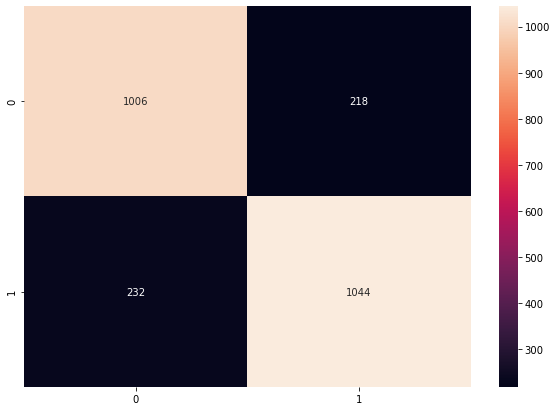

In [ ]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, tf_idf_predicted)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1']],
                  columns = [i for i in ['0', '1']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [2]:
all_features = tfidf_vect.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=', '
    
print(top_features)  

print(" ") 
print(" ") 

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

NameError: ignored

### **Model 1 - Count vectorizer compared to Model 2 - TF-IDF**

In [ ]:
#convert the test samples into a dataframe where the columns are
#the y_test(ground truth labels),tf-idf model predicted labels(tf_idf_predicted),Count Vectorizer model predicted labels(count_vectorizer_predicted)
df = pd.DataFrame(y_test.tolist(),columns =['y_test'])
df['count_vectorizer_predicted'] = count_vectorizer_predicted
df['tf_idf_predicted'] = tf_idf_predicted
df.head()

,y_test,count_vectorizer_predicted,tf_idf_predicted
0,1,1,1
1,1,1,1
2,1,1,1
3,0,0,0
4,1,0,1


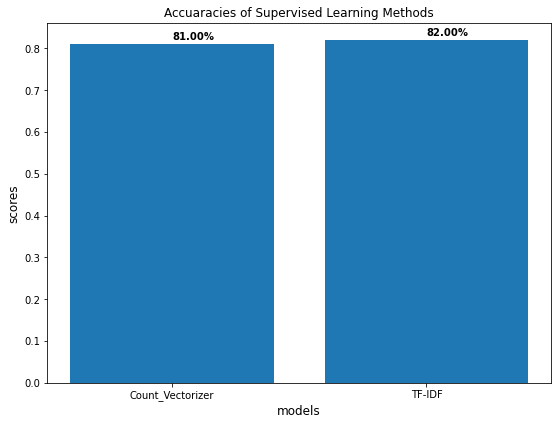

In [ ]:
#create bar plot to compare the accuaracies of Count Vectorizer and TF-IDF
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
subjects = ['Count_Vectorizer', 'TF-IDF']

# calculation accuracies of Count Vectorizer and TF-IDF using accuracy_score metrics
scores = [accuracy_score(y_test,count_vectorizer_predicted),accuracy_score(y_test,tf_idf_predicted)]
ax.bar(subjects,scores)
ax.set_ylabel('scores',fontsize= 12)    # y axis label
ax.set_xlabel('models',fontsize= 12)    # x axis label
ax.set_title('Accuaracies of Supervised Learning Methods')  # tittle
for i, v in enumerate(scores):
    ax.text( i ,v+0.01, '{:.2f}%'.format(100*v), color='black', fontweight='bold')     
    plt.savefig('barplot_1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

**Observations**

- **Model 1- TF-IDF** performs slightly better than **Model 2 - TF-IDF**. This is probably because it focuses on the frequency of words present in the corpus and provides the importance of the words. 
- We can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions. 

### **Unsupervised Learning Method for Sentiment Analysis**

**Model 1: VADER**

**VADER** (Valence Aware Dictionary and Sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool. VADER not only tells us about the Positivity and Negativity score, but also tells us how positve or negative a sentiment is.

In [ ]:
import nltk
#download vader lexicon
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

sentiment = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mithu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
data_new = data.copy()   #make a copy of dataframe and do unsupervised operations on that dataframe

In [ ]:
#Calculate the polarity score of the reviews
data_new['scores'] = data_new['review'].apply(lambda review: sentiment.polarity_scores(review))

data_new.head()

,review,sentiment,scores
0,okay know doesnt project india good light over...,1,"{'neg': 0.197, 'neu': 0.558, 'pos': 0.245, 'co..."
1,despite john travolta statements interview fav...,0,"{'neg': 0.075, 'neu': 0.651, 'pos': 0.274, 'co..."
2,kung fu fan woo fan interest gangster movies f...,1,"{'neg': 0.258, 'neu': 0.442, 'pos': 0.3, 'comp..."
3,seem control freak hear comment lose control s...,0,"{'neg': 0.165, 'neu': 0.677, 'pos': 0.158, 'co..."
4,admittedly scenes movie seem little unrealisti...,1,"{'neg': 0.106, 'neu': 0.69, 'pos': 0.203, 'com..."


In [ ]:
#Calculate the compund score of the reviews
data_new['compound']  = data_new['scores'].apply(lambda score_dict: score_dict['compound'])

data_new.head()

,review,sentiment,scores,compound
0,okay know doesnt project india good light over...,1,"{'neg': 0.197, 'neu': 0.558, 'pos': 0.245, 'co...",0.3806
1,despite john travolta statements interview fav...,0,"{'neg': 0.075, 'neu': 0.651, 'pos': 0.274, 'co...",0.9894
2,kung fu fan woo fan interest gangster movies f...,1,"{'neg': 0.258, 'neu': 0.442, 'pos': 0.3, 'comp...",0.4913
3,seem control freak hear comment lose control s...,0,"{'neg': 0.165, 'neu': 0.677, 'pos': 0.158, 'co...",-0.1531
4,admittedly scenes movie seem little unrealisti...,1,"{'neg': 0.106, 'neu': 0.69, 'pos': 0.203, 'com...",0.9347


In [ ]:
#Classify the class of the review by keeping threshold on the compund score
data_new['comp_score'] = data_new['compound'].apply(lambda c: '1' if c >=0 else '0')

data_new.head()

,review,sentiment,scores,compound,comp_score
0,okay know doesnt project india good light over...,1,"{'neg': 0.197, 'neu': 0.558, 'pos': 0.245, 'co...",0.3806,1
1,despite john travolta statements interview fav...,0,"{'neg': 0.075, 'neu': 0.651, 'pos': 0.274, 'co...",0.9894,1
2,kung fu fan woo fan interest gangster movies f...,1,"{'neg': 0.258, 'neu': 0.442, 'pos': 0.3, 'comp...",0.4913,1
3,seem control freak hear comment lose control s...,0,"{'neg': 0.165, 'neu': 0.677, 'pos': 0.158, 'co...",-0.1531,0
4,admittedly scenes movie seem little unrealisti...,1,"{'neg': 0.106, 'neu': 0.69, 'pos': 0.203, 'com...",0.9347,1


In [ ]:
data["VADER_pred"] = data_new['comp_score'].tolist()
data.head()

,review,sentiment,VADER_pred
0,okay know doesnt project india good light over...,1,1
1,despite john travolta statements interview fav...,0,1
2,kung fu fan woo fan interest gangster movies f...,1,1
3,seem control freak hear comment lose control s...,0,0
4,admittedly scenes movie seem little unrealisti...,1,1


In [ ]:
#Calculate the accuracy of the Vader Sentiment Analysis
data["sentiment"] = data["sentiment"].astype(int)   #convert the sentiment column values into int data type
data["VADER_pred"] = data["VADER_pred"].astype(int) #convert the vader_predicted column values into int data type
print("Accuaracy using Vader Sentiment Analysis is : ",
      accuracy_score(data["sentiment"].tolist(),data["VADER_pred"].tolist()))

Accuaracy using Vader Sentiment Analysis is :  0.6714


[[2324 2639]
 [ 647 4390]]


<AxesSubplot:>

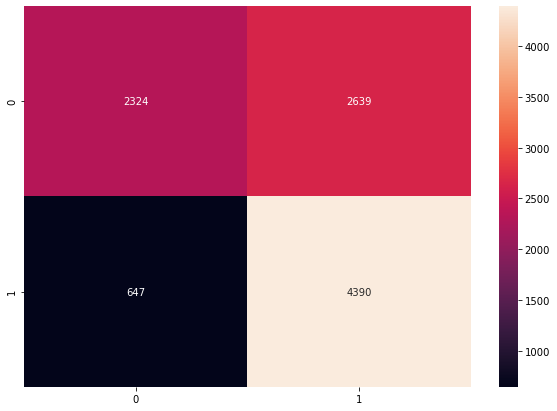

In [ ]:
# Print and plot Confusion matrix to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(data["sentiment"].tolist(), data['VADER_pred'].tolist())

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1']],
                  columns = [i for i in ['0', '1']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

**Model 4: TextBlob**

With the help of the TextBlob.sentiment() method, we can get the sentiment of the sentences through another perspective.

In [ ]:
from textblob import TextBlob # importing TextBlob

In [ ]:
data_new = data.copy()      #make a copy of dataframe and do unsupervised operations on that dataframe

In [ ]:
#Calculate the polarity score of the reviews
data_new['polarity']  = data_new['review'].apply(lambda review: TextBlob(review).sentiment.polarity)

data_new.head()

,review,sentiment,VADER_pred,polarity
0,okay know doesnt project india good light over...,1,1,0.215851
1,despite john travolta statements interview fav...,0,1,0.190805
2,kung fu fan woo fan interest gangster movies f...,1,1,0.160546
3,seem control freak hear comment lose control s...,0,0,-0.095960
4,admittedly scenes movie seem little unrealisti...,1,1,0.121566


In [ ]:
#Classify the class of the review by keeping threshold on the polarity score
data_new['polarity_score'] = data_new['polarity'].apply(lambda c: '1' if c >=0 else '0')

data_new.head()

,review,sentiment,VADER_pred,polarity,polarity_score
0,okay know doesnt project india good light over...,1,1,0.215851,1
1,despite john travolta statements interview fav...,0,1,0.190805,1
2,kung fu fan woo fan interest gangster movies f...,1,1,0.160546,1
3,seem control freak hear comment lose control s...,0,0,-0.095960,0
4,admittedly scenes movie seem little unrealisti...,1,1,0.121566,1


In [ ]:
data["Text_Blob_pred"] = data_new['polarity_score'].tolist()
data.head()

,review,sentiment,VADER_pred,Text_Blob_pred
0,okay know doesnt project india good light over...,1,1,1
1,despite john travolta statements interview fav...,0,1,1
2,kung fu fan woo fan interest gangster movies f...,1,1,1
3,seem control freak hear comment lose control s...,0,0,0
4,admittedly scenes movie seem little unrealisti...,1,1,1


In [ ]:
#Calculate the accuracy of the Vader Sentiment Analysis
data["sentiment"] = data["sentiment"].astype(int)  #convert the sentiment column values into int data type
data["Text_Blob_pred"] = data["Text_Blob_pred"].astype(int)  #convert the textblob predicted column values into int data type
print("Accuaracy of using Text Blob Sentiment Analysis is : ",
      accuracy_score(data["sentiment"].tolist(),data["Text_Blob_pred"].tolist()))

Accuaracy of using Text Blob Sentiment Analysis is :  0.6856


[[2160 2803]
 [ 341 4696]]


<AxesSubplot:>

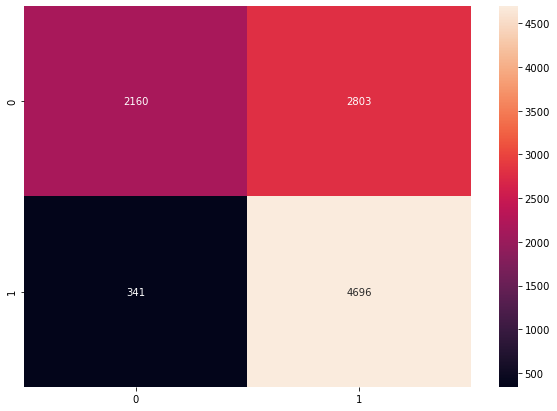

In [ ]:
# Print and plot a confusion matrix to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(data["sentiment"].tolist(), data['Text_Blob_pred'].tolist())

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['0', '1']],
                  columns = [i for i in ['0', '1']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

### **Model 3 - VADER compared to Model 4 - TextBlob**

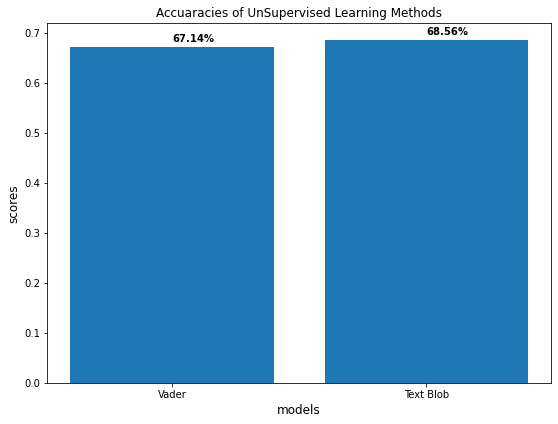

In [ ]:
#plot the accuracies of the text blob and Vader
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
subjects = ['Vader', 'Text Blob']
# calculating accuracies of Vader and Textblob models using accuracy_score metrics
scores = [accuracy_score(data["sentiment"].tolist(),data["VADER_pred"].tolist()),accuracy_score(data["sentiment"].tolist(),data["Text_Blob_pred"].tolist())]
ax.bar(subjects,scores)
ax.set_ylabel('scores',fontsize= 12)   # y-axis labels
ax.set_xlabel('models',fontsize= 12)   # x-axis labels
ax.set_title('Accuaracies of UnSupervised Learning Methods')   #title of the graph
for i, v in enumerate(scores):
    ax.text( i ,v+0.01, '{:.2f}%'.format(100*v), color='black', fontweight='bold')
    plt.savefig('barplot_1.png',dpi=100, format='png', bbox_inches='tight')
plt.show()

**Observations**

- **TextBlob** works better than **VADER** with things like slang, emojis, etc
- **VADER** performs strongly with more formal language usage.  

**Takeways** 

- We used Exploratory Data Analysis and preprocessing on the text
- We encoded text data using count vectorizers and TD-IDF
- We classfied the encoded text using Machine Learning Models
- We used unsupervised learning methods for sentiment analysis like VADER and TextBlob
- We compared the various machine learning models to see whcih models are most useful for which types of texts

